# IMPORTING PACKAGES AND MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATA

In [2]:
cltv=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

# CHECKING THE SHAPE OF THE DATAFRAME(i.e.)NO. OF OBSERVATIONS AND VARIABLES

In [3]:
cltv.shape

(9134, 24)

So,In this DataFrame we are having 9134 observations and 24 variables

In [4]:
pd.set_option('max_columns',24)
pd.set_option('max_rows',9134)

In [5]:
cltv.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


Here Customer,Effective To Date are not features used for predictions.So,I am dropping them.

In [6]:
cltv.drop(['Customer','Effective To Date'],axis=1,inplace=True)

In [7]:
cltv.shape

(9134, 22)

In [8]:
cltv.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Here we are having white space between the variable names.We have to replace it with _ to avoid issues during model building

In [9]:
old=cltv.columns
print(old)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [10]:
for x in old:
    if len(str.split(x,' '))>1:
        cltv.rename(columns={x:str.join('_',str.split(x,' '))},inplace=True)

In [11]:
cltv.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

# DESCRIPTIVE ANALYSIS

In [12]:
cltv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               9134 non-null int64
Policy_Type                      9134 non-null object
Policy                           9

Here are no null values in this dataframe

## UNI-VARIENT ANALYSIS

### DEPENDENT VARIABLE

since our dependent variable is continous, we can make a boxplot and distplot.      
Boxplot is used to check outliers.       
Distplot is used to check normality.        

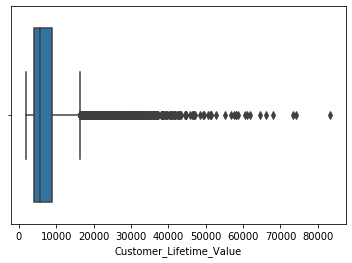

In [13]:
sns.boxplot(cltv['Customer_Lifetime_Value'])

In [14]:
len(cltv[cltv['Customer_Lifetime_Value']>20000])

575

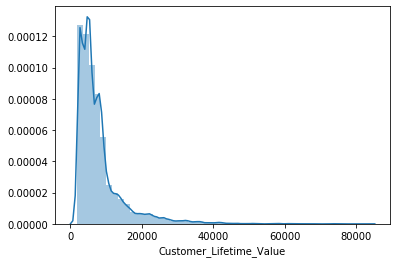

In [15]:
sns.distplot(cltv['Customer_Lifetime_Value'])

From the above plots,the variable has a lot of outliers.

### INDEPENDENT VARIABLES

#### CONTINOUS VARIABLES

In [16]:
numerical_columns=cltv.select_dtypes(exclude='object').columns
numerical_columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies',
       'Total_Claim_Amount'],
      dtype='object')

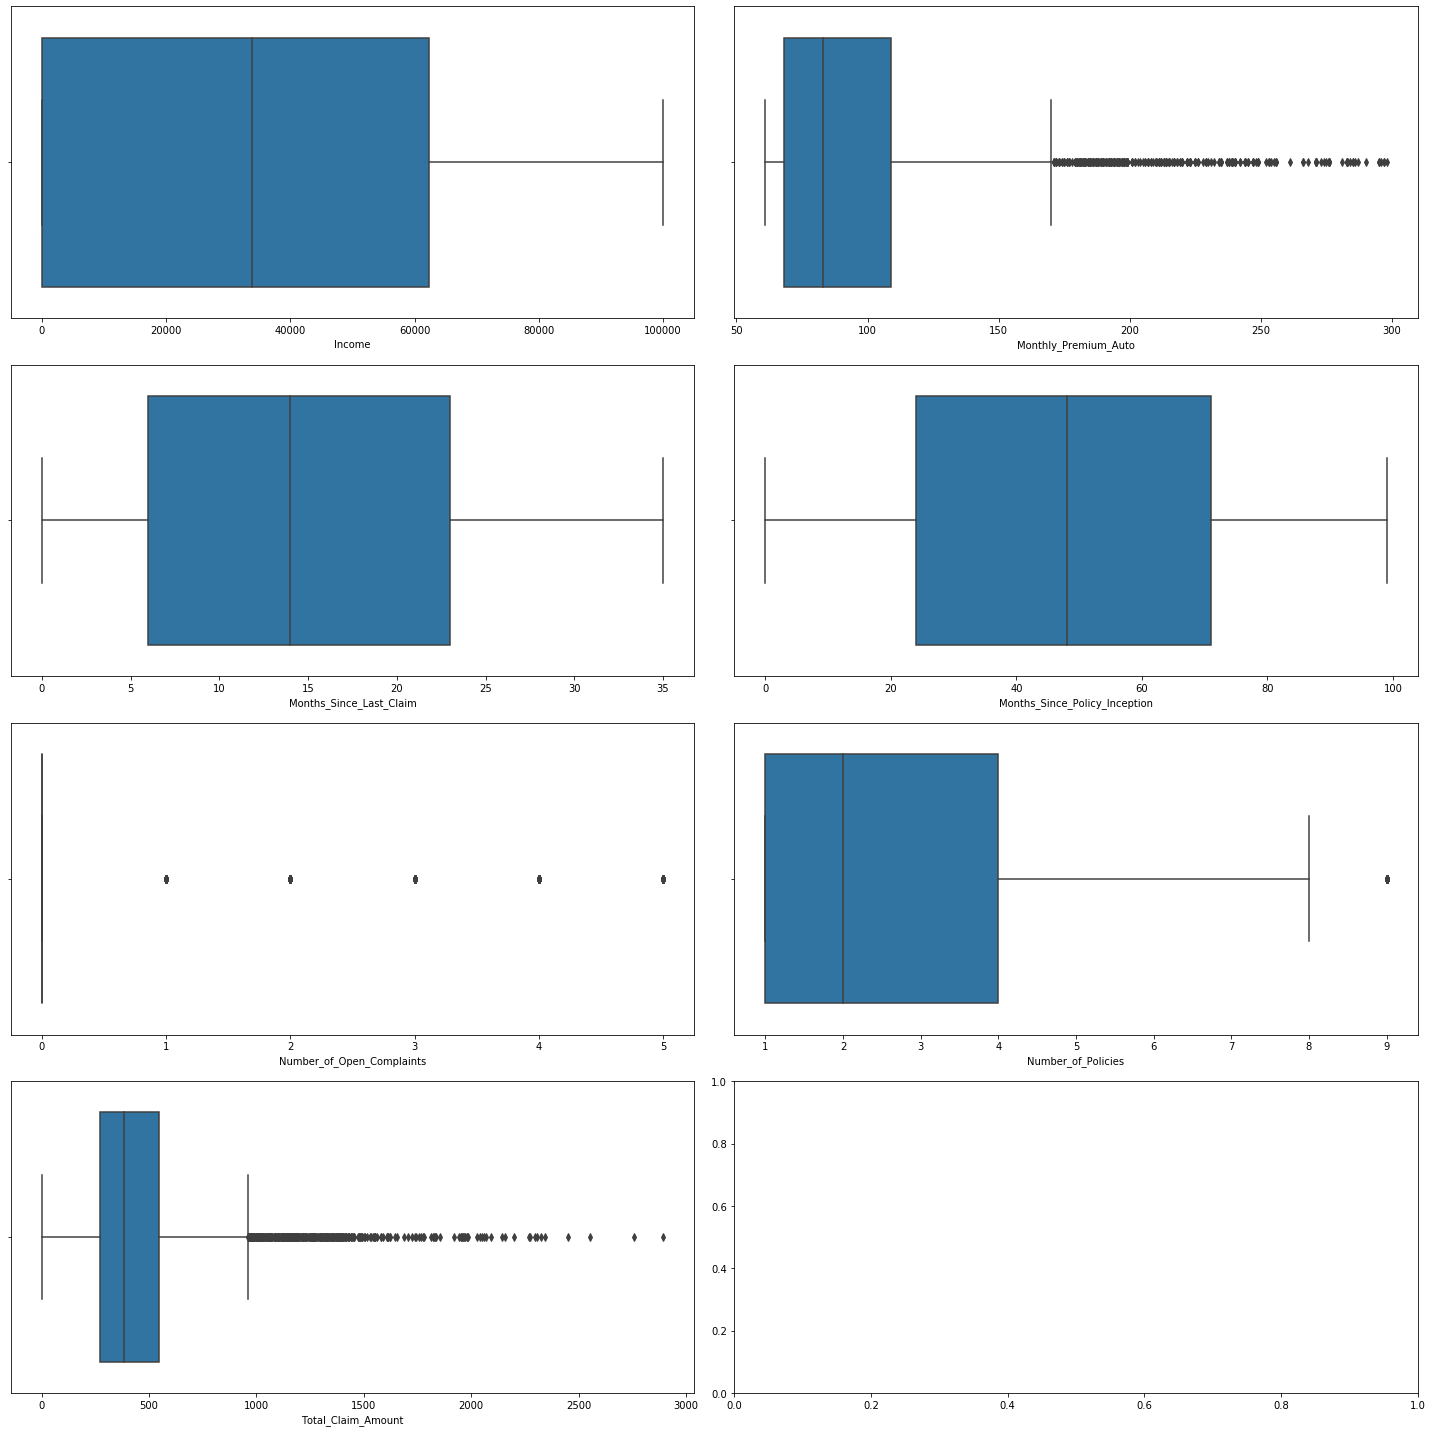

In [17]:
fig, ax = plt.subplots(4,2,figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(numerical_columns[1:]):
    sns.boxplot(cltv[col], ax = ax[i])
    
plt.tight_layout()
plt.show()
    

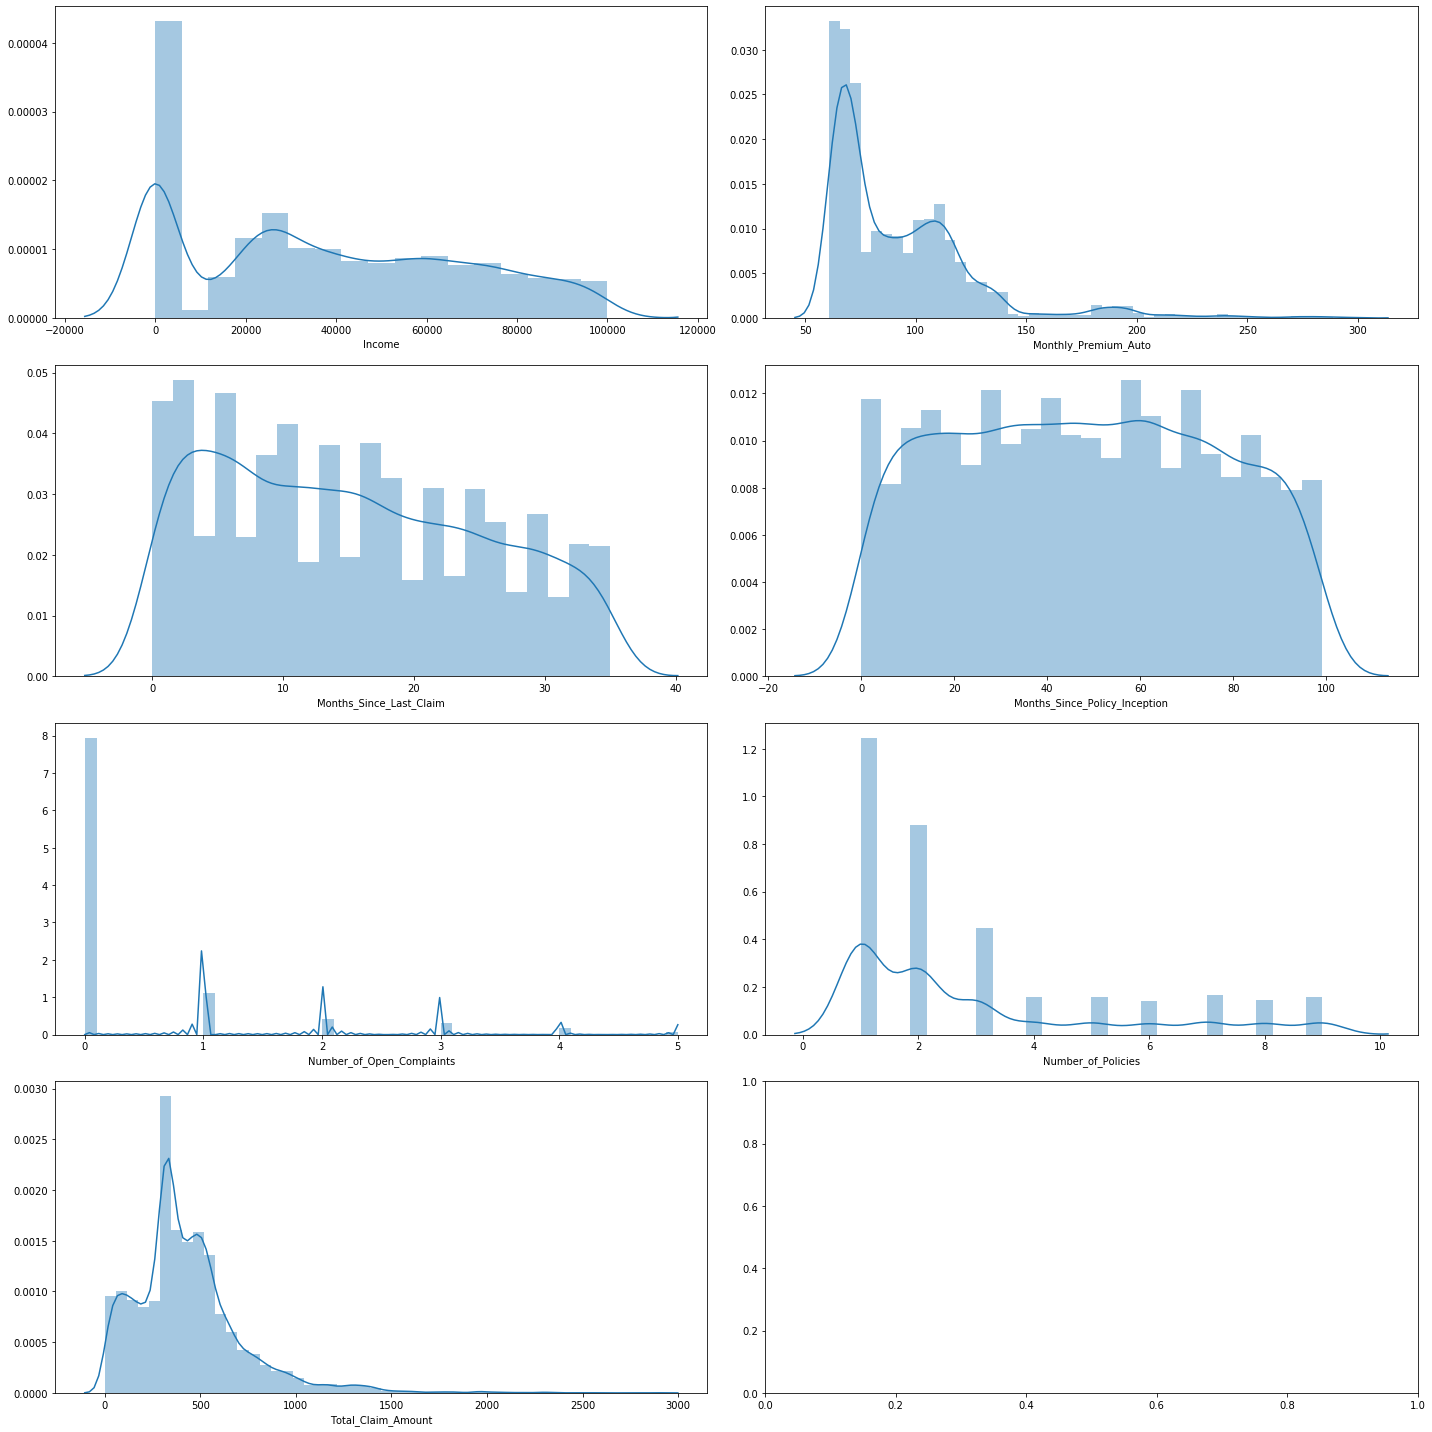

In [18]:
fig, ax = plt.subplots(4,2,figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(numerical_columns[1:]):
    sns.distplot(cltv[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

#### CATEGORICAL VARIABLES

In [19]:
categorical_columns=cltv.select_dtypes('object').columns
categorical_columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

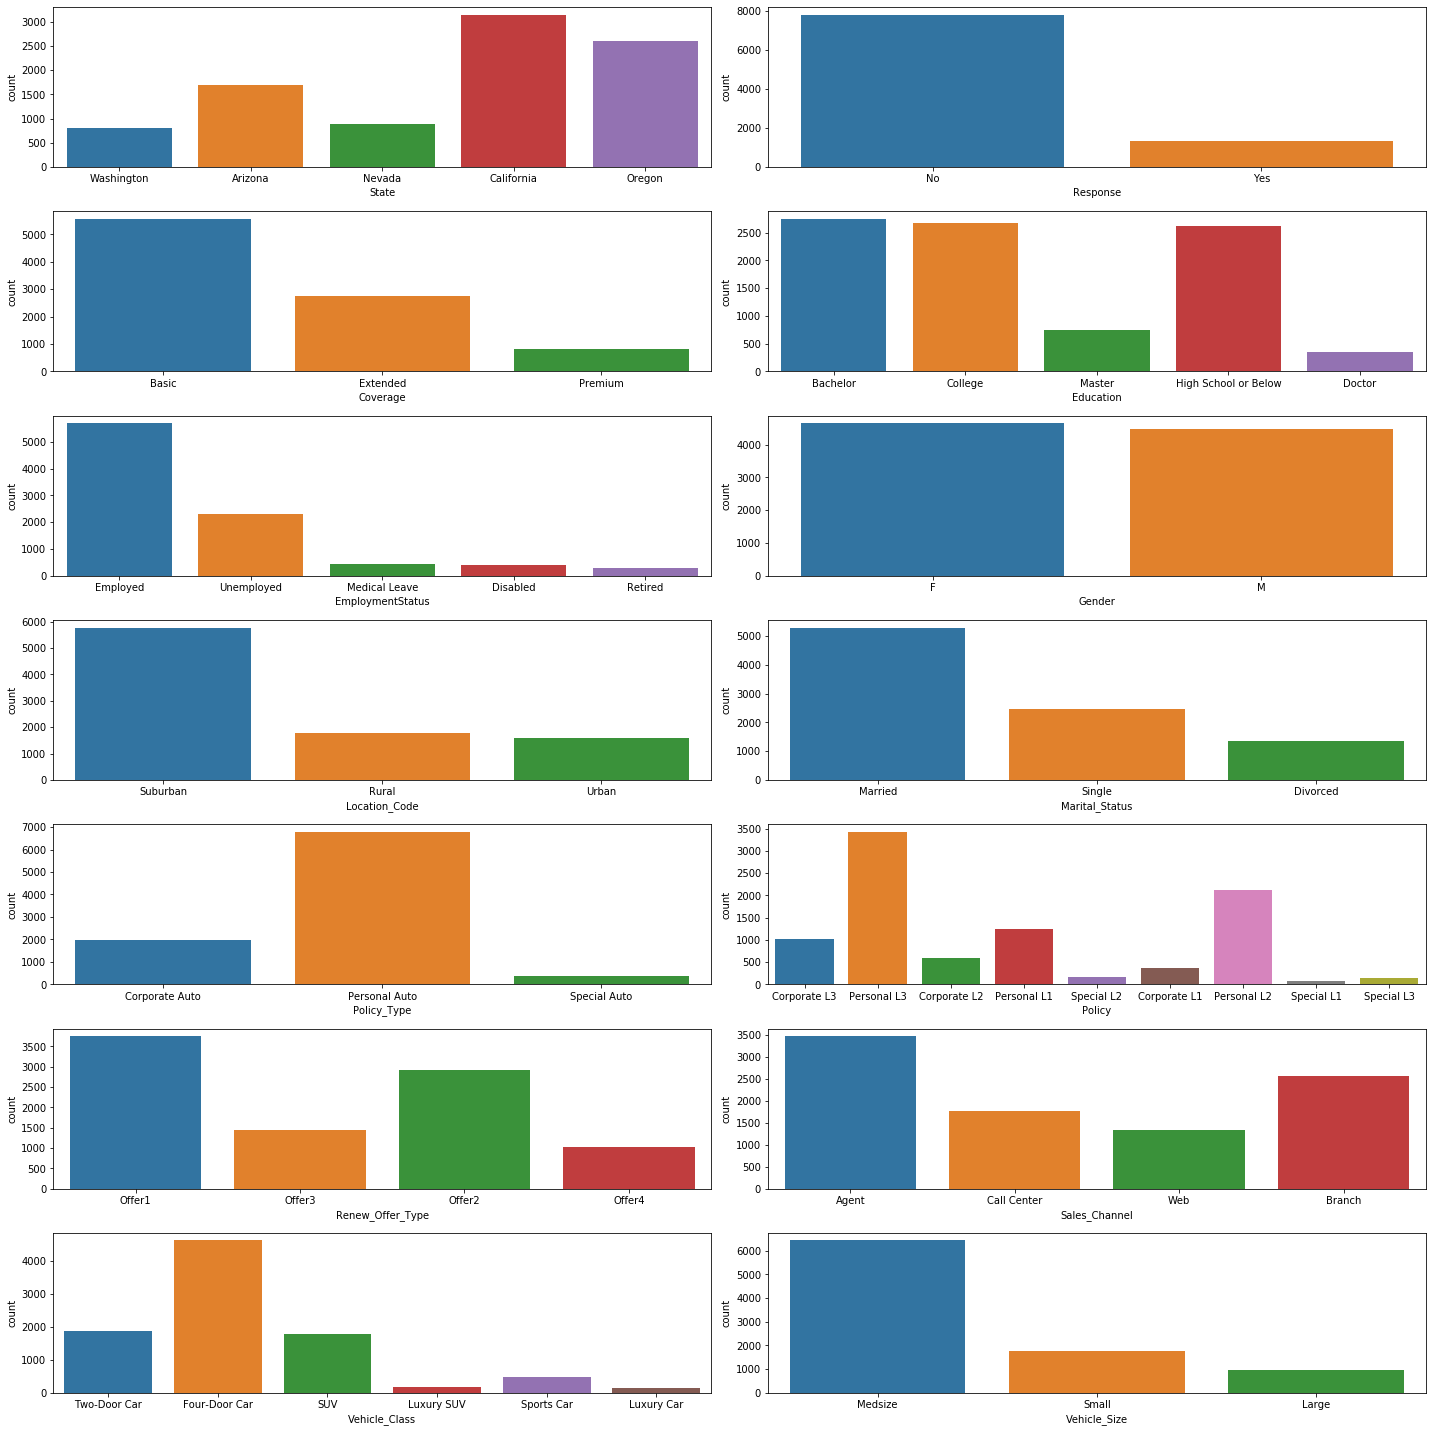

In [20]:
fig, ax = plt.subplots(7,2,figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(cltv[col], ax = ax[i])
    
plt.tight_layout()
plt.show()
    

## BI-VARIENT ANALYSIS

### CONTINOUS VS CONTINOUS 

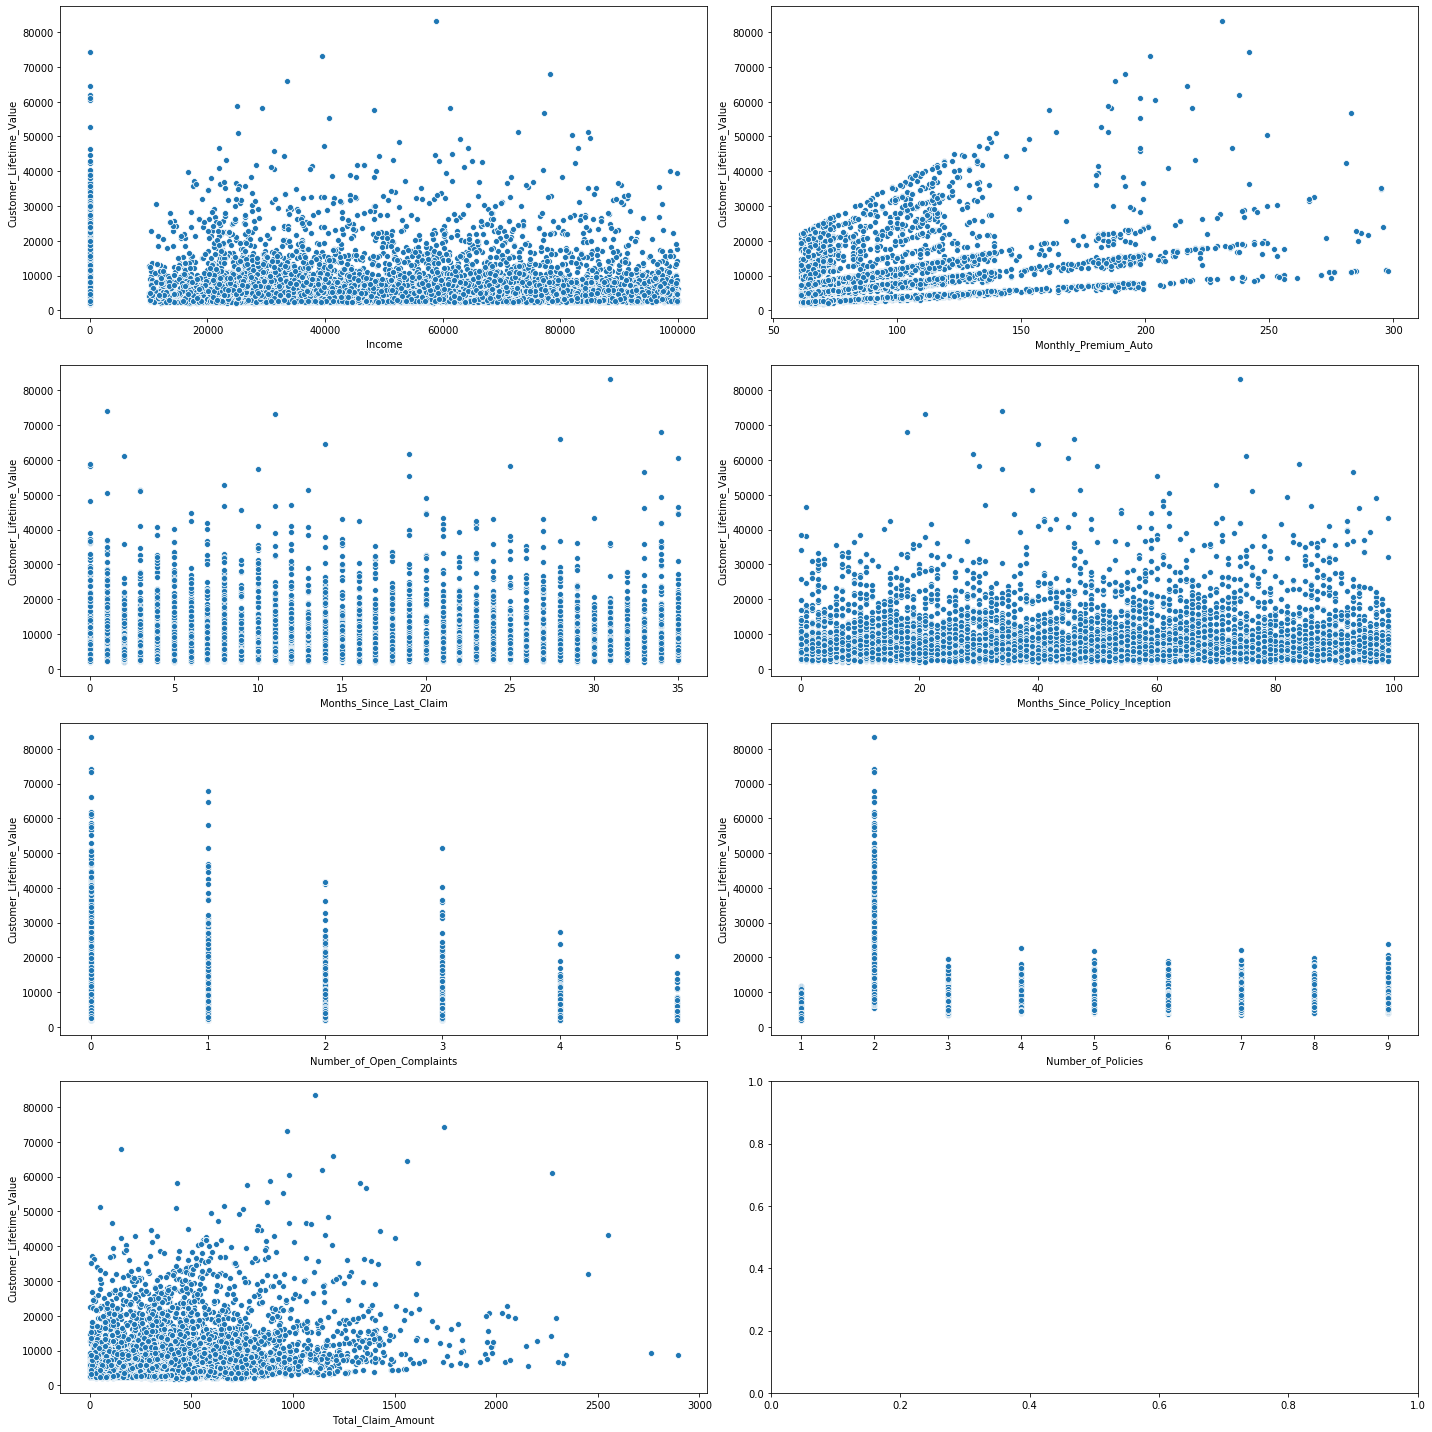

In [21]:
fig, ax = plt.subplots(4,2,figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(numerical_columns[1:]):
    sns.scatterplot(cltv[col],cltv['Customer_Lifetime_Value'], ax = ax[i])
    
plt.tight_layout()
plt.show()

### CONTINOUS VS CATEGORICAL

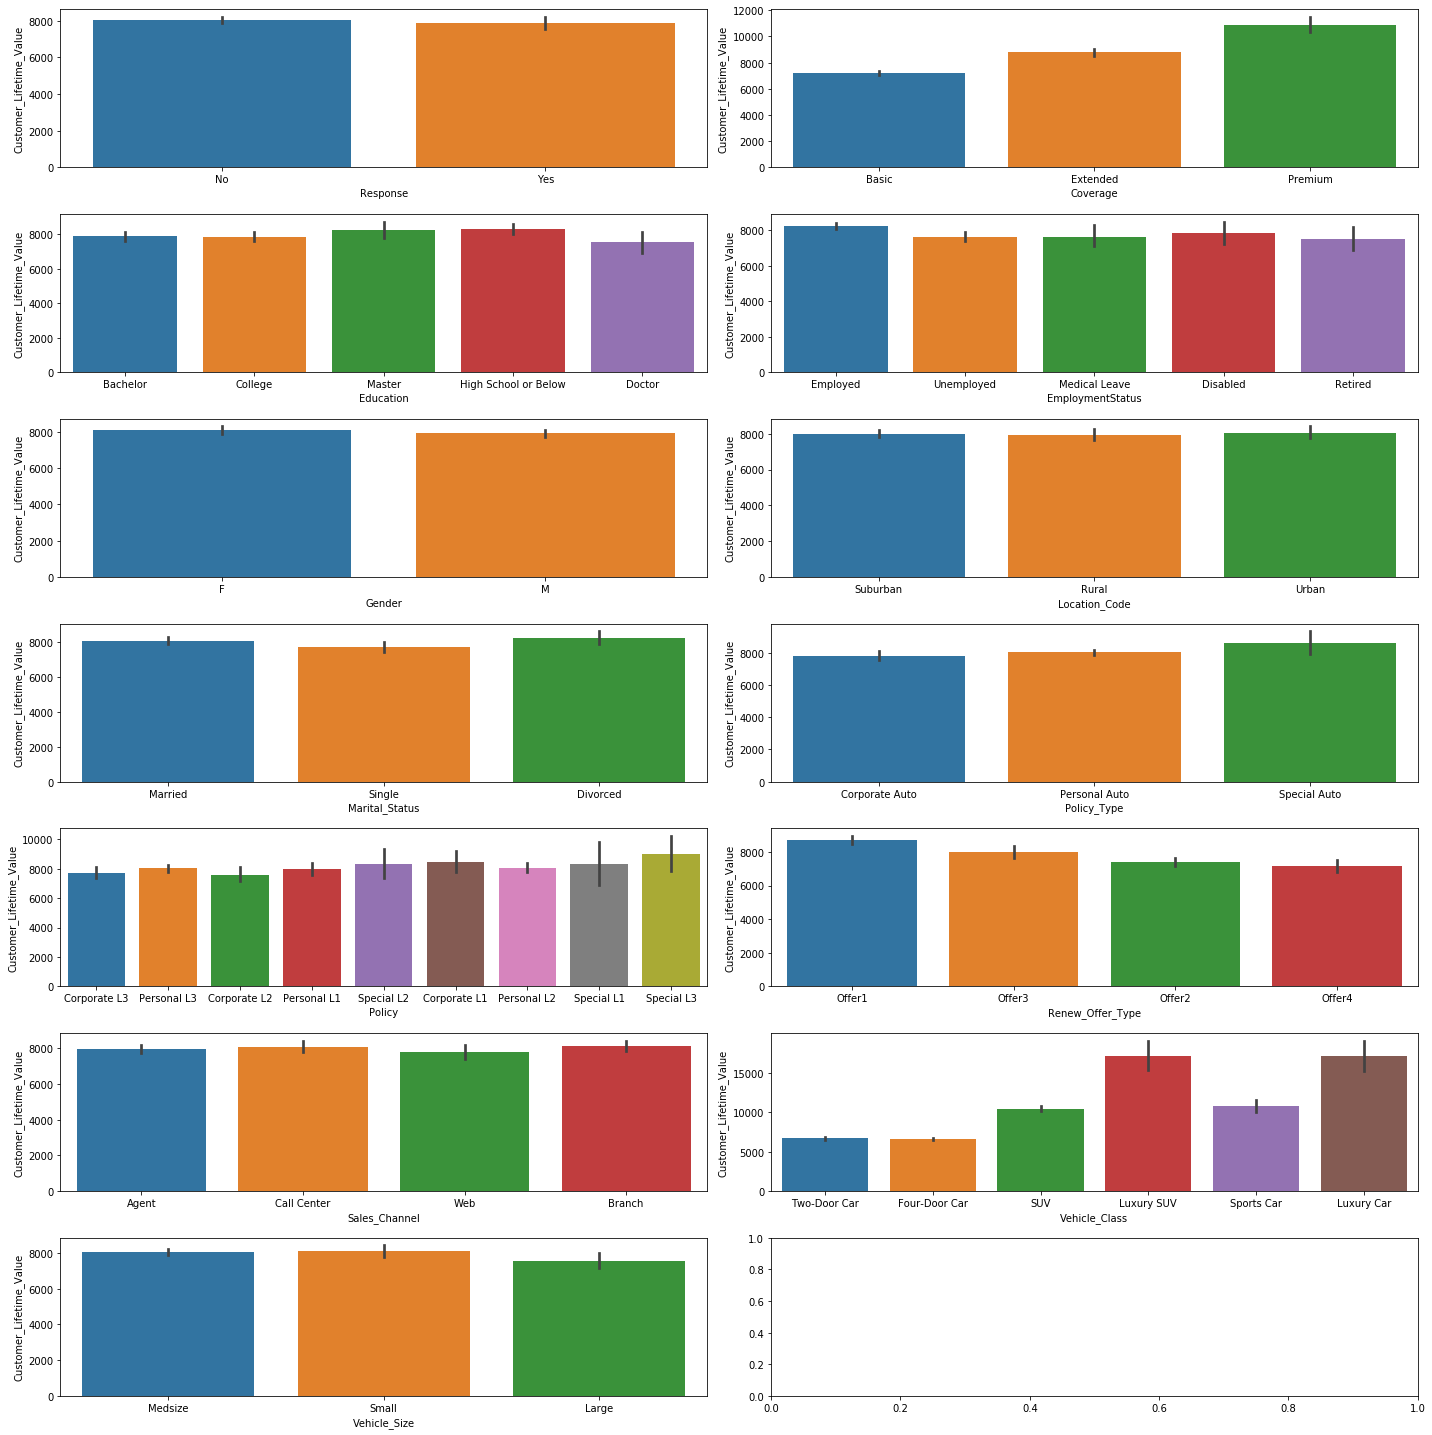

In [22]:
fig, ax = plt.subplots(7,2,figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(categorical_columns[1:]):
    sns.barplot(cltv[col],cltv['Customer_Lifetime_Value'], ax = ax[i])
    
plt.tight_layout()
plt.show()

## PAIR PLOT

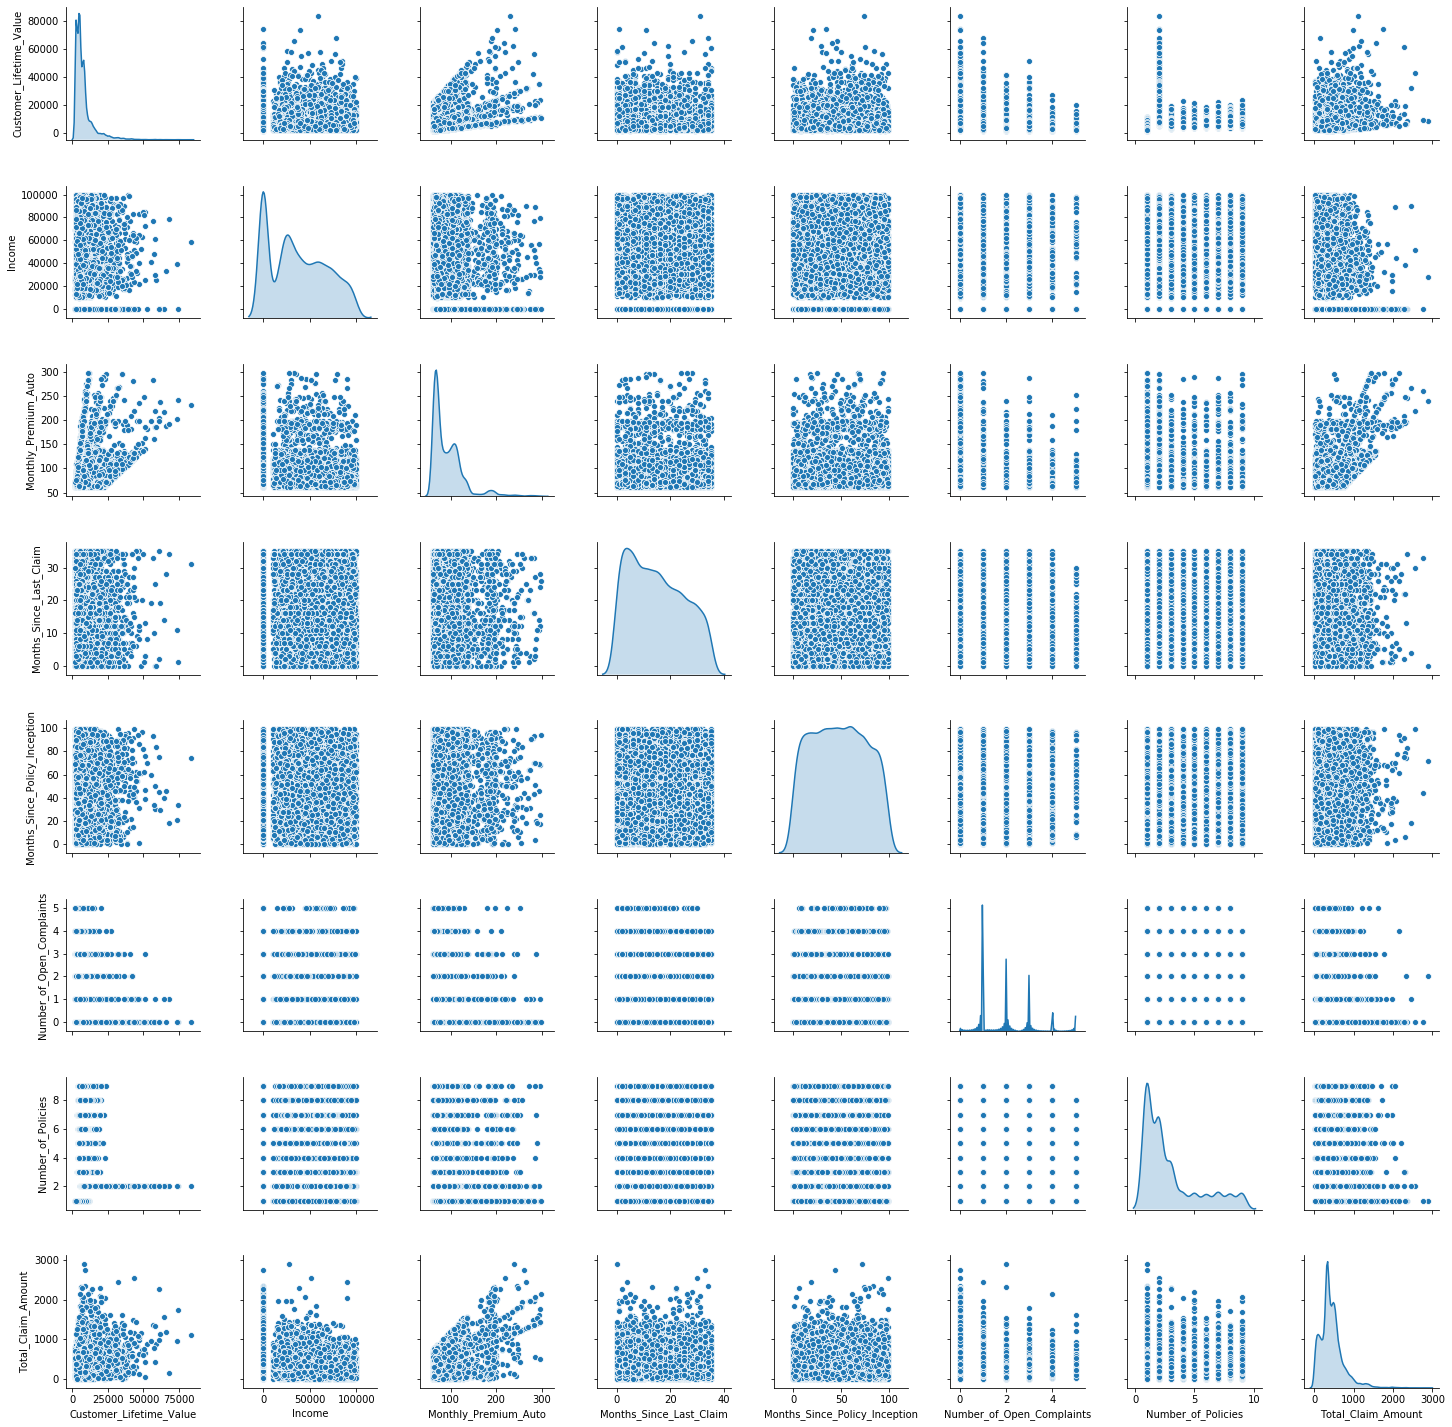

In [23]:
sns.pairplot(cltv,diag_kind='kde')

## CORRELATION PLOT

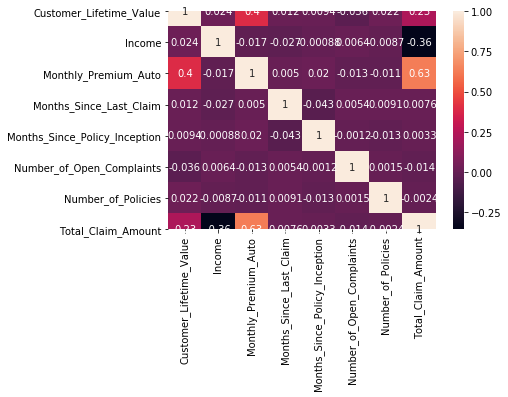

In [24]:
sns.heatmap(cltv.corr(),annot=True)
plt.show()

# INFERENTIAL STATISTICS

In [25]:
import scipy.stats as stats
import statsmodels.api as sm
from   statsmodels.formula.api import ols

## CONTINOUS VS CATEGORICAL

In [26]:
model = ols('Customer_Lifetime_Value ~ State+Response+Coverage+Education+EmploymentStatus+Gender+Location_Code+Marital_Status+Policy_Type+Policy+Renew_Offer_Type+Sales_Channel+Vehicle_Class+Vehicle_Size+Number_of_Open_Complaints+Number_of_Policies', data = cltv).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
State,2.383239e+07,4.0,0.150377,9.628909e-01
Response,4.723494e+07,1.0,1.192165,2.749222e-01
Coverage,1.046736e+10,2.0,132.093093,2.821852e-57
Education,2.657972e+08,4.0,1.677118,1.522217e-01
EmploymentStatus,6.658737e+08,4.0,4.201506,2.120987e-03
Gender,6.836154e+07,1.0,1.725381,1.890351e-01
Location_Code,4.573965e+07,2.0,0.577213,5.614817e-01
Marital_Status,2.455006e+08,2.0,3.098102,4.518246e-02
Policy_Type,1.662542e+08,2.0,2.098049,1.227549e-01
Policy,5.665030e+08,8.0,1.787250,7.447737e-02


## CONTINOUS VS CONTINOUS 

In [27]:
for x in numerical_columns[1:]:
    print(x,stats.levene(cltv['Customer_Lifetime_Value'],cltv[x]))

Income LeveneResult(statistic=14561.788375652717, pvalue=0.0)
Monthly_Premium_Auto LeveneResult(statistic=4216.358073406346, pvalue=0.0)
Months_Since_Last_Claim LeveneResult(statistic=4248.982669080376, pvalue=0.0)
Months_Since_Policy_Inception LeveneResult(statistic=4216.887393743943, pvalue=0.0)
Number_of_Open_Complaints LeveneResult(statistic=4266.186781083777, pvalue=0.0)
Number_of_Policies LeveneResult(statistic=4263.478122717005, pvalue=0.0)
Total_Claim_Amount LeveneResult(statistic=3844.596676341633, pvalue=0.0)


# CONVERTING CATEGORICAL COLUMNS FROM STRING TO NUMERICAL USING LABEL ENCODING

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cltv[categorical_columns]=cltv[categorical_columns].apply(le.fit_transform)

In [29]:
cltv.head()

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


# BUILDING BASE MODELS

In [89]:
X=cltv.drop('Customer_Lifetime_Value',axis=1)
y=cltv['Customer_Lifetime_Value']

In [31]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.165
Model:                                 OLS   Adj. R-squared:                  0.163
Method:                      Least Squares   F-statistic:                     85.81
Date:                     Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                             07:48:14   Log-Likelihood:                -92835.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9112   BIC:                         1.859e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           531.5725    473.375      1.123      0.261    -396.349    1459.494
State                            28.4756     51.117      0.557      0.577     -71.726     128.677
Response                       -448.3788    192.408     -2.330      0.020    -825.541     -71.217
Coverage                       -183.7890    113.701     -1.616      0.106    -406.669      39.091
Education                        93.0832     47.790      1.948      0.051      -0.597     186.763
EmploymentStatus               -106.4348     73.604     -1.446      0.148    -250.715      37.845
Gender                         -144.5589    132.636     -1.090      0.276    -404.556     115.438
Income                            0.0022      0.003      0.669      0.504      -0.004       0.009
Location_Code                   103.5590    116.578      0.888      0.374    -124.961     332.079
Marital_Status                 -237.2764    110.660     -2.144      0.032    -454.195     -20.358
Monthly_Premium_Auto             82.6770      2.925     28.270      0.000      76.944      88.410
Months_Since_Last_Claim           6.7966      6.546      1.038      0.299      -6.036      19.629
Months_Since_Policy_Inception    -0.7811      2.373     -0.329      0.742      -5.433       3.871
Number_of_Open_Complaints      -247.8781     72.360     -3.426      0.001    -389.719    -106.037
Number_of_Policies               63.2701     27.663      2.287      0.022       9.044     117.496
Policy_Type                     448.5882    291.059      1.541      0.123    -121.953    1019.130
Policy                          -47.9853     86.264     -0.556      0.578    -217.082     121.112
Renew_Offer_Type               -348.5079     68.493     -5.088      0.000    -482.770    -214.245
Sales_Channel                    23.5601     62.295      0.378      0.705     -98.551     145.672
Total_Claim_Amount               -0.5824      0.362     -1.609      0.108      -1.292       0.127
Vehicle_Class                    46.4930     32.422      1.434      0.152     -17.060     110.047
Vehicle_Size                    186.6798    123.372      1.513      0.130     -55.157     428.517
==============================================================================
Omnibus:                     5665.297   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64590.396
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      14.713   Cond. No.                     3.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

# CHECKING ASSUMPTIONS FOR LINEAR REGRESSION

## AUTO CORRELATION

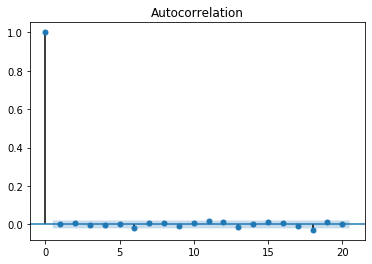

In [32]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(lin_reg.resid, lags=20,alpha=0.05)
acf.show()

In [33]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(64590.395842403734, 0.0)


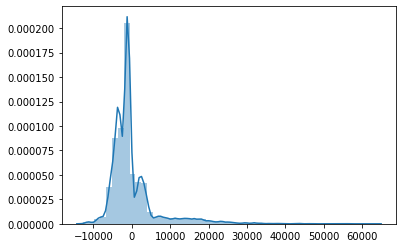

In [34]:
import seaborn as sns
sns.distplot(lin_reg.resid)

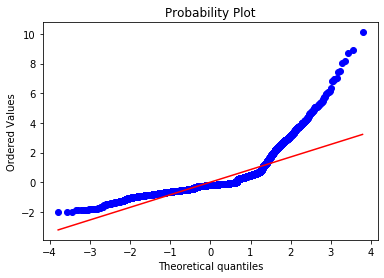

In [35]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

[('F statistic', 1.2292534429860833), ('p-value', 1.812387097226792e-12)]

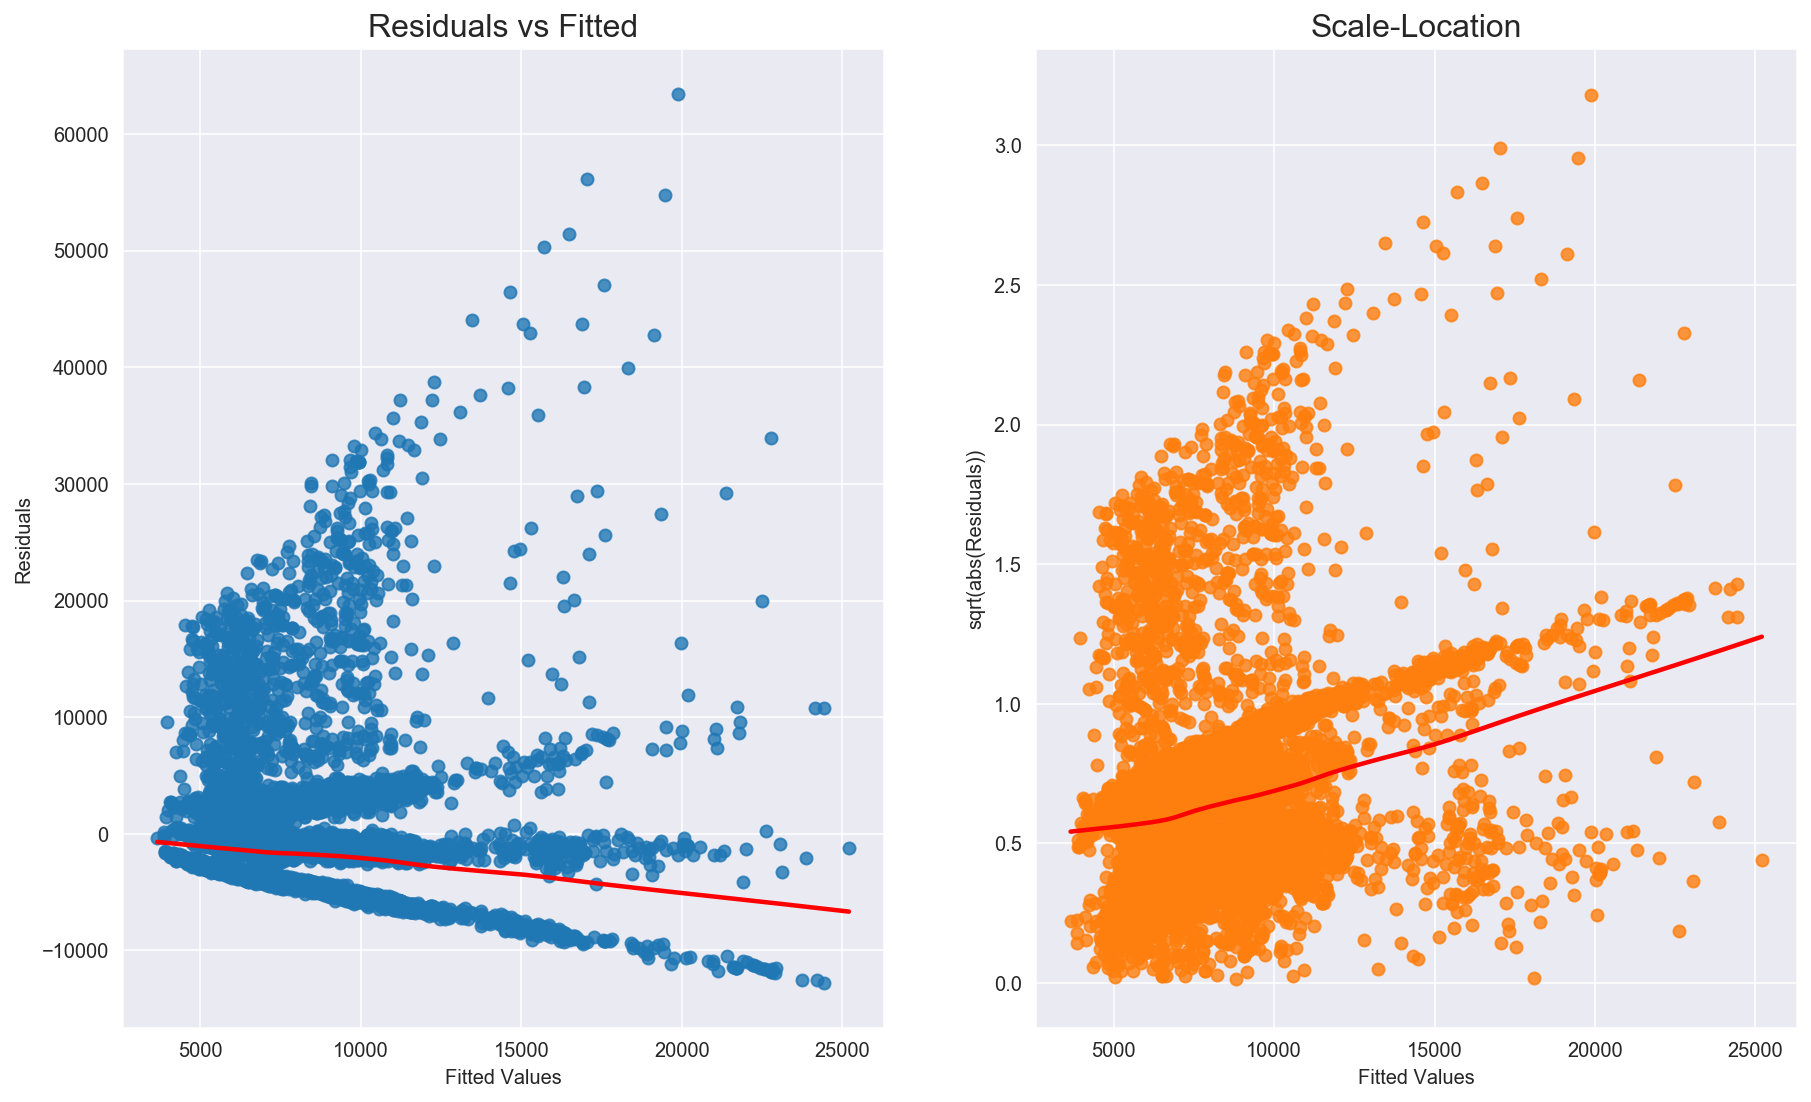

In [36]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
vif,1.001755,1.050177,1.285413,1.008389,2.275066,1.016448,2.262285,1.152772,1.148111,2.340932,1.005291,1.014031,1.003197,1.010664,4.437124,4.43695,1.101028,1.026054,2.556664,1.044258,1.015859


# MODEL BUILDING USING TRAIN_TEST_SPLIT

In [38]:
def algo(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    print('{} train score:{}'.format(model,model.score(X_train,y_train)))
    print('{} test score:{}'.format(model,model.score(X_test,y_test)))

### LINEAR REGRESSION

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
lr=LinearRegression()
algo(lr,X_train,X_test,y_train,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) train score:0.1681963201866039
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) test score:0.1541115533348123


### DECISION TREE REGRESSION

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
algo(dt,X_train,X_test,y_train,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:1.0
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.5265616297910343


### HYPER PARAMETER TUNING OF DECISION TREE

In [41]:
from sklearn.model_selection import GridSearchCV
gsv=GridSearchCV(dt,param_grid={'max_depth':range(1,10)})
gsv.fit(X_train,y_train)
gsv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### DECISION TREE AFTER HYPERTUNING

In [42]:
dt1=DecisionTreeRegressor(max_depth=4)
algo(dt1,X_train,X_test,y_train,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:0.6801912308350204
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.6494226649946312


### RANDOM FOREST REGRESSOR

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
algo(rfr,X_train,X_test,y_train,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) train score:0.9405072606636772
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) test score:0.6764605161443806


### HYPER PARAMETER TUNING OF RANDOM FOREST REGRESSOR

In [44]:
gsv=GridSearchCV(rfr,param_grid={'max_depth':range(1,10),'n_estimators':range(10,30)})
gsv.fit(X_train,y_train)
gsv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# RANDOM FOREST REGRESSOR AFTER HYPERTUNING 

In [45]:
rfr1=RandomForestRegressor(max_depth=9,n_estimators=24)
algo(rfr1,X_train,X_test,y_train,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) train score:0.8212157472511927
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) test score:0.6897001962637093


# K NEAREST NEIGHBORS REGRESSOR

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
algo(knn,X_train,X_test,y_train,y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') train score:0.32445104646815837
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') test score:0.059743867218045255


# BAGGING OF DECISION TREE

In [47]:
from sklearn.ensemble import BaggingRegressor
bag= BaggingRegressor(dt1)
algo(bag,X_train,X_test,y_train,y_test)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=4,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

# BOOSTING OF RANDOM FOREST REGRESSOR

In [48]:
from sklearn.ensemble import AdaBoostRegressor
boost= AdaBoostRegressor(rfr1)
algo(boost,X_train,X_test,y_train,y_test)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=9,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=24,
                                                       n_jobs=None,
                                                       oob_score=False,
                           

# BUILDING ALL MODELS USING CROSS VALIDATION TECHIQUE

In [52]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold, cross_val_score

In [53]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
models=[lr,dt,dt1,rfr,rfr1,knn,bag,boost]
for model in models:
    cv_results = model_selection.cross_val_score(model,X,y,cv = kfold)
    print(model,np.mean(cv_results),np.var(cv_results,ddof=1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.15315228927662794 0.0021471152800535557
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 0.4144560441363391 0.01283690067498326
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 0.6583740922676569 0.0005034386735426538
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                

# POLYNOMIAL REGRESSION 

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
pf=PolynomialFeatures(degree=2)
X_train_poly=pf.fit_transform(X_train)
X_train_poly=pd.DataFrame(X_train_poly)
X_train_poly.head()

,0,1,2,3,4,5,6,7,8,9,10,11,...,241,242,243,244,245,246,247,248,249,250,251,252
0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,48567.0,1.0,2.0,130.0,12.0,...,3.0,1.0,0.0,0.000000,0.0,0.0,389376.00000,1872.0,624.000000,9.0,3.0,1.0
1,1.0,3.0,0.0,1.0,0.0,1.0,0.0,26877.0,1.0,1.0,131.0,5.0,...,9.0,6.0,0.0,0.000000,0.0,0.0,395389.44000,1886.4,1257.600000,9.0,6.0,4.0
2,1.0,1.0,1.0,1.0,1.0,3.0,0.0,12902.0,1.0,0.0,139.0,3.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,445155.84000,2668.8,667.200000,16.0,4.0,1.0
3,1.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,1.0,2.0,121.0,5.0,...,4.0,1.0,1.0,871.200000,4.0,1.0,758989.44000,3484.8,871.200000,16.0,4.0,1.0
4,1.0,0.0,0.0,1.0,2.0,1.0,1.0,70247.0,0.0,2.0,83.0,13.0,...,0.0,3.0,4.0,283.598844,0.0,2.0,20107.07608,0.0,141.799422,0.0,0.0,1.0


In [67]:
X_test_poly=pf.transform(X_test)
X_test_poly=pd.DataFrame(X_test_poly)
X_test_poly.head()

,0,1,2,3,4,5,6,7,8,9,10,11,...,241,242,243,244,245,246,247,248,249,250,251,252
0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,74585.0,0.0,1.0,106.0,1.0,...,3.0,1.0,0.0,0.000000,0.0,0.0,47785.114022,655.794195,218.598065,9.0,3.0,1.0
1,1.0,3.0,0.0,0.0,3.0,1.0,0.0,23218.0,1.0,2.0,71.0,7.0,...,15.0,3.0,0.0,0.000000,0.0,0.0,200518.964907,2238.967200,447.793440,25.0,5.0,1.0
2,1.0,3.0,1.0,1.0,1.0,1.0,0.0,94903.0,1.0,1.0,94.0,3.0,...,5.0,2.0,0.0,0.000000,0.0,0.0,203581.440000,2256.000000,902.400000,25.0,10.0,4.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,77153.0,2.0,1.0,99.0,3.0,...,0.0,0.0,1.0,355.641958,0.0,1.0,126481.202290,0.000000,355.641958,0.0,0.0,1.0
4,1.0,4.0,0.0,0.0,3.0,0.0,0.0,23769.0,1.0,0.0,69.0,18.0,...,0.0,0.0,1.0,470.097411,0.0,1.0,220991.575829,0.000000,470.097411,0.0,0.0,1.0


In [68]:
def algo(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    print('{} train score:{}'.format(model,model.score(X_train,y_train)))
    print('{} test score:{}'.format(model,model.score(X_test,y_test)))

In [69]:
models=[lr,dt,dt1,rfr,rfr1,knn,bag,boost]
for x in models:
    algo(x,X_train_poly,X_test_poly,y_train,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) train score:0.28049765259679005
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) test score:0.2218962809612769
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:1.0
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.4655417305902232
DecisionTreeRegres

# POLYNOMIAL REGRESSION AND FEATURE SELECTION BASED ON P_VALUES

In [71]:
pf.fit(X)
X_poly=pf.transform(X)
X_poly=pd.DataFrame(X_poly)
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,10,11,...,241,242,243,244,245,246,247,248,249,250,251,252
0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,56274.0,1.0,1.0,69.0,32.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.480796e+05,1924.055735,384.811147,25.0,5.0,1.0
1,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,2.0,94.0,13.0,...,0.0,2.0,0.0,0.000000,0.0,0.0,1.280213e+06,0.000000,1131.464935,0.0,0.0,1.0
2,1.0,2.0,0.0,2.0,0.0,1.0,0.0,48767.0,1.0,1.0,108.0,18.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,3.208908e+05,2832.361235,566.472247,25.0,5.0,1.0
3,1.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,106.0,18.0,...,0.0,0.0,4.0,1059.762688,6.0,2.0,2.807742e+05,1589.644032,529.881344,9.0,3.0,1.0
4,1.0,4.0,0.0,0.0,0.0,1.0,1.0,43836.0,0.0,2.0,73.0,12.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.908014e+04,0.000000,138.130879,0.0,0.0,1.0


In [72]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X_poly)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.272
Model:                                 OLS   Adj. R-squared:                  0.251
Method:                      Least Squares   F-statistic:                     13.26
Date:                     Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                             09:53:31   Log-Likelihood:                -92211.
No. Observations:                     9134   AIC:                         1.849e+05
Df Residuals:                         8883   BIC:                         1.867e+05
Df Model:                              250                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -9026.1361   2620.163     -3.445      0.001   -1.42e+04   -3890.011
1           -169.4829    387.444     -0.437      0.662    -928.963     589.997
2           3008.3770    687.745      4.374      0.000    1660.238    4356.516
3          -1504.5690    955.334     -1.575      0.115   -3377.245     368.107
4            321.8527    365.209      0.881      0.378    -394.041    1037.746
5           1691.0338    746.267      2.266      0.023     228.178    3153.889
6            536.5575    459.542      1.168      0.243    -364.252    1437.367
7              0.0470      0.029      1.600      0.110      -0.011       0.105
8          -1101.5786   1034.856     -1.064      0.287   -3130.135     926.978
9           2462.7407    823.387      2.991      0.003     848.713    4076.769
10            86.0217     30.750      2.797      0.005      25.744     146.300
11           -34.6536     50.459     -0.687      0.492    -133.566      64.258
12             4.6837     18.251      0.257      0.797     -31.092      40.460
13           567.3261    553.276      1.025      0.305    -517.223    1651.875
14          3263.6340    224.008     14.569      0.000    2824.527    3702.741
15         -2871.3051   2119.736     -1.355      0.176   -7026.478    1283.868
16           803.6059    651.994      1.233      0.218    -474.453    2081.665
17           808.0258    513.899      1.572      0.116    -199.336    1815.388
18           -43.2202    466.917     -0.093      0.926    -958.485     872.045
19             4.6865      3.199      1.465      0.143      -1.584      10.957
20           -33.4206    508.602     -0.066      0.948   -1030.398     963.557
21           113.5507    884.872      0.128      0.898   -1621.002    1848.103
22            19.2079     45.454      0.423      0.673     -69.893     108.309
23          -128.1588    143.765     -0.891      0.373    -409.971     153.654
24            54.2799     85.797      0.633      0.527    -113.902     222.462
25            24.4788     35.739      0.685      0.493     -45.577      94.535
26           107.6127     54.759      1.965      0.049       0.273     214.953
27           172.6808     99.018      1.744      0.081     -21.418     366.780
28             0.0066      0.002      2.724      0.006       0.002       0.011
29          -173.0753     87.196     -1.985      0.047    -344.000      -2.150
30           -87.3279     82.466     -1.059      0.290    -248.980      74.324
31            -0.3440      2.243     -0.153      0.878      -4.741       4.053
32            -3.4151      4.876     -0.700      0.484     -12.972       6.142
33            -0.4164      1.766     -0.236      0.814      -3.879       3.046
34           -73.3497     54.254     -1.352      0.176    -179.700      33.000
35             7.7812     

In [80]:
pvalues=lin_reg.pvalues[lin_reg.pvalues<=0.05]

In [81]:
pvalues.index

Int64Index([  0,   2,   5,   9,  10,  14,  26,  28,  29,  43,  50,  51,  58,
             85,  91,  98, 100, 102, 120, 123, 137, 139, 148, 155, 156, 169,
            180, 181, 182, 186, 192, 194, 197, 204, 208, 217, 220, 224, 229,
            235, 241, 245],
           dtype='int64')

In [83]:
X_poly_p=X_poly[pvalues.index]
X_poly_p.head()

,0,2,5,9,10,14,26,28,29,43,50,51,...,192,194,197,204,208,217,220,224,229,235,241,245
0,1.0,0.0,1.0,1.0,69.0,1.0,4.0,225096.0,4.0,0.0,0.0,0.0,...,64.0,0.0,32.0,0.0,0.0,1.0,0.0,1.0,0.000000,769.622294,0.0,0.0
1,1.0,0.0,4.0,2.0,94.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,0.0,13.0,0.0,0.0,64.0,16.0,8.0,1131.464935,5657.324675,0.0,0.0
2,1.0,0.0,1.0,1.0,108.0,2.0,2.0,97534.0,2.0,0.0,0.0,0.0,...,90.0,0.0,18.0,0.0,0.0,4.0,0.0,2.0,566.472247,2832.361235,0.0,0.0
3,1.0,0.0,4.0,1.0,106.0,7.0,4.0,0.0,1.0,0.0,0.0,0.0,...,18.0,36.0,18.0,130.0,0.0,49.0,0.0,7.0,0.000000,529.881344,0.0,6.0
4,1.0,0.0,1.0,2.0,73.0,1.0,4.0,175344.0,0.0,0.0,0.0,0.0,...,36.0,0.0,12.0,0.0,0.0,1.0,0.0,1.0,138.130879,414.392637,0.0,0.0


In [85]:
Xp_train,Xp_test,yp_train,yp_test=train_test_split(X_poly_p,y,test_size=0.30,random_state=42)

In [87]:
models=[lr,dt,dt1,rfr,rfr1,knn,bag,boost]
for x in models:
    algo(x,Xp_train,Xp_test,yp_train,yp_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) train score:0.2508853155364519
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) test score:0.2406993400378289
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:1.0
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.5003219571720385
DecisionTreeRegress

# SINCE KNN IS A DISTANCE BASED ALGORITHM WE HAVE TO SCALE THE DATA AND APPLY THE ALGORITHM

In [91]:
X.head(3)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,4,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1


In [92]:
y.head(3)

0     2763.519279
1     6979.535903
2    12887.431650
Name: Customer_Lifetime_Value, dtype: float64

In [93]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [94]:
ss.fit(X_train)
X_train=pd.DataFrame(ss.transform(X_train))
X_test=pd.DataFrame(ss.transform(X_test))

In [95]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.764880,2.472091,0.795074,-1.134736,-0.603277,-0.980635,0.358577,0.029702,1.400291,1.060461,-0.306594,-1.18442,-0.416368,-0.8279,-1.753803,-1.753082,0.031417,-1.031349,0.646074,0.534959,-0.168538
1,0.982325,-0.404516,0.795074,-1.134736,-0.603277,-0.980635,-0.359109,0.029702,-0.173836,1.089407,-0.998842,-1.65118,-0.416368,-0.8279,0.354520,0.117321,2.010242,-1.031349,0.662484,0.534959,1.695582


In [96]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.582785,-0.404516,-0.73362,1.046372,-0.603277,1.019748,1.219468,-1.621451,-0.173836,0.365757,-1.394413,0.036337,-0.416368,-0.827900,0.35452,0.740788,0.031417,-1.031349,-0.739919,0.534959,-0.168538
1,0.982325,-0.404516,-0.73362,1.046372,-0.603277,-0.980635,-0.480179,0.029702,1.400291,-0.647352,-0.801057,-1.363943,-0.416368,0.422556,0.35452,0.117321,2.010242,-1.031349,0.043657,1.501195,-0.168538


In [97]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
algo(knn,X_train,X_test,y_train,y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') train score:0.38625342032639787
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') test score:0.1143819920274689
